# Assignment 10
## Applied Machine Learning

Andrew Chan 
EBE869

# 1. [10 pts] Download the labeled dataset, 
if you like use a dummy email address for
registration. There must be 8 data files, each representing a particular cyber-attack type
and it's day, and it's collected pcap data

This assignment assumes that the following 8 .csv files are in the same directory as this notebook:
* Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
* Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
* Friday-WorkingHours-Morning.pcap_ISCX.csv
* Monday-WorkingHours.pcap_ISCX.csv
* Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
* Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
* Tuesday-WorkingHours.pcap_ISCX.csv
* Wednesday-workingHours.pcap_ISCX.csv

In [1]:
import os
print('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv \n  File size: ' + str(os.path.getsize('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')/1024**2) + ' MB')
print('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv \n  File size: ' + str(os.path.getsize('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')/1024**2) + ' MB')
print('Friday-WorkingHours-Morning.pcap_ISCX.csv \n  File size: ' + str(os.path.getsize('Friday-WorkingHours-Morning.pcap_ISCX.csv')/1024**2) + ' MB')
print('Monday-WorkingHours.pcap_ISCX.csv \n  File size: ' + str(os.path.getsize('Monday-WorkingHours.pcap_ISCX.csv')/1024**2) + ' MB')
print('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv \n  File size: ' + str(os.path.getsize('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')/1024**2) + ' MB')
print('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv \n  File size: ' + str(os.path.getsize('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')/1024**2) + ' MB')
print('Tuesday-WorkingHours.pcap_ISCX.csv \n  File size: ' + str(os.path.getsize('Tuesday-WorkingHours.pcap_ISCX.csv')/1024**2) + ' MB')
print('Wednesday-workingHours.pcap_ISCX.csv \n  File size: ' + str(os.path.getsize('Wednesday-workingHours.pcap_ISCX.csv')/1024**2) + ' MB')

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv 
  File size: 73.55104351043701 MB
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv 
  File size: 73.34343719482422 MB
Friday-WorkingHours-Morning.pcap_ISCX.csv 
  File size: 55.61516284942627 MB
Monday-WorkingHours.pcap_ISCX.csv 
  File size: 168.73161125183105 MB
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv 
  File size: 79.25265884399414 MB
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv 
  File size: 49.61324977874756 MB
Tuesday-WorkingHours.pcap_ISCX.csv 
  File size: 128.82136821746826 MB
Wednesday-workingHours.pcap_ISCX.csv 
  File size: 214.73540782928467 MB


# 2. [10 pts] Pick one of the data files, call it Dataset 1, and examine its features. Make sure it has more than one class value for its label

* Picked `Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv`

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

# Locate and load the data file
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.head()

N rows=225745, M columns=79


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df.columns.values

array([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Varia

In [4]:
df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

In [5]:
df[' Label'].value_counts()

DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64

# 3. [10 pts] For the Dataset 1, pick a machine learning methodology and justify your choice.


* I will choose Random Forest Classifier

# 4. [10 pts] Process the class feature/category as binary classes for supervised learning, assign BENIGN to value 0 and the rest to value 1. Check its balance for the Dataset 1

In [6]:
class_mapping = { 'BENIGN' : 0, 'DDoS' : 1 }

In [7]:
df[' Label'] = df[' Label'].map(class_mapping)

In [8]:
df[' Label'].value_counts()

1    128027
0     97718
Name:  Label, dtype: int64

# 5. [10 pts] Explore Dataset 1 features with respect to the class. 
(Hint: features Source Port
and Destination Port are very useful, research and find out important networking port
numbers and one-hot-encode them. Unimportant port numbers or source port numbers can
be assigned to a feature called 'other ports')

In [9]:
df = df.fillna(df.mean())

## One hot encoding

Convert `Destination Port` to string

Only include important ports:

https://opensource.com/article/18/10/common-network-ports

| Port Number | Description |
| --- | --- |
| 20 | File Transfer Protocol (FTP) Data Transfer |
| 21 | File Transfer Protocol (FTP) Command Control |
| 22 | Secure Shell (SSH) |
| 23 | Telnet - Remote login service, unencrypted text messages |
| 25 | Simple Mail Transfer Protocol (SMTP) E-mail Routing |
| 53 | Domain Name System (DNS) service |
| 80 | Hypertext Transfer Protocol (HTTP) used in World Wide Web |
| 110 | Post Office Protocol (POP3) used by e-mail clients to retrieve e-mail from a server |
| 119 | Network News Transfer Protocol (NNTP) |
| 123 | Network Time Protocol (NTP) |
| 143 | Internet Message Access Protocol (IMAP) Management of Digital Mail |
| 161 | Simple Network Management Protocol (SNMP) |
| 194 | Internet Relay Chat (IRC)  |
| 443 | HTTP Secure (HTTPS) HTTP over TLS/SSL   |

In [10]:
importantPorts = df[' Destination Port'].isin([20,21,22,23,25,53,80,110,119,123,143,161,194,443])

df[' Destination Port'] = df[' Destination Port'].where(importantPorts,'other ports')

df[' Destination Port'] = df[' Destination Port'].astype(str) 

In [11]:
x = df[' Destination Port'].value_counts()

In [12]:
from sklearn.preprocessing import OneHotEncoder
X_y = df.values
X_y.shape

(225745, 79)

In [13]:
passthrough = []
for i in range(1,79):
    passthrough.append(i)

In [14]:
from sklearn.compose import ColumnTransformer
c_transf = ColumnTransformer([ 
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', passthrough)
])
X_y_ohe = c_transf.fit_transform(X_y).astype(float)

In [15]:
X_y_ohe.shape

(225745, 85)

# 6. [10 pts] Display some histograms and anything you deem fit to pick independent Dataset 1 features. 
(Hint: source/destination bytes, packets, ports and the duration features)

In [16]:
df_corr = df.corr()

In [17]:
sorted_df = df_corr.sort_values(by=' Label')

In [18]:
sorted_df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
URG Flag Count,0.130012,-0.063042,0.021412,0.317221,-0.061142,0.354549,0.282352,0.426718,0.328437,-0.297731,...,-0.057450,0.066837,-0.024896,0.048784,0.071720,0.158294,0.116776,0.167592,0.121579,-0.463190
Min Packet Length,-0.222332,-0.080692,-0.070150,-0.130595,-0.075541,-0.135658,0.046058,-0.123147,-0.137333,-0.365553,...,0.396536,-0.116335,-0.030198,-0.116084,-0.113898,-0.190135,-0.143862,-0.202572,-0.143757,-0.427396
min_seg_size_forward,-0.112832,-0.005388,0.009922,-0.048262,-0.015588,-0.074322,-0.000325,-0.077440,-0.075503,-0.232879,...,1.000000,-0.058579,-0.010963,-0.055414,-0.055221,-0.139772,-0.099363,-0.146873,-0.109090,-0.407315
Bwd Packet Length Min,-0.150860,-0.058771,-0.040638,-0.073738,-0.047682,-0.076854,0.033618,-0.067832,-0.078285,-0.229004,...,0.343618,-0.071126,-0.016336,-0.069810,-0.069898,-0.135351,-0.092328,-0.140788,-0.107084,-0.365667
Avg Fwd Segment Size,0.257098,0.017458,0.032013,0.858439,-0.042980,0.940954,0.277425,1.000000,0.919632,-0.221994,...,-0.077440,0.145882,-0.002609,0.127892,0.148842,0.262143,0.223047,0.287524,0.187498,-0.356895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fwd Avg Packets/Bulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fwd Avg Bulk Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bwd Avg Bytes/Bulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bwd Avg Packets/Bulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
sorted_df = df_corr.sort_values(by=' Label',ascending=False)
sorted_df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Label,0.025923,-0.029870,-0.069290,-0.319693,0.041244,-0.321529,-0.180094,-0.356895,-0.300271,0.577323,...,-0.407315,0.022905,-0.070408,-0.009271,0.033821,0.087114,0.078023,0.096775,0.061243,1.000000
Bwd Packet Length Mean,0.176030,0.044903,0.077473,-0.199152,0.162835,-0.209415,-0.131073,-0.238341,-0.196846,0.961442,...,-0.238532,0.126631,-0.018005,0.104015,0.131586,0.184541,0.191300,0.213836,0.116561,0.603299
Avg Bwd Segment Size,0.176030,0.044903,0.077473,-0.199152,0.162835,-0.209415,-0.131073,-0.238341,-0.196846,0.961442,...,-0.238532,0.126631,-0.018005,0.104015,0.131586,0.184541,0.191300,0.213836,0.116561,0.603299
Bwd Packet Length Max,0.176183,0.036765,0.064136,-0.184076,0.144765,-0.194168,-0.124594,-0.221994,-0.182455,1.000000,...,-0.232879,0.120209,-0.014283,0.100149,0.124584,0.178270,0.181758,0.205558,0.113910,0.577323
Bwd Packet Length Std,0.164360,0.008661,0.033976,-0.184303,0.116924,-0.189367,-0.120963,-0.214916,-0.176954,0.992683,...,-0.234919,0.114848,-0.024741,0.091211,0.120694,0.174000,0.179434,0.201309,0.110371,0.576155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fwd Avg Packets/Bulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fwd Avg Bulk Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bwd Avg Bytes/Bulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bwd Avg Packets/Bulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
sorted_df[' Label'].values

array([ 1.        ,  0.6032992 ,  0.6032992 ,  0.5773235 ,  0.57615485,
        0.4542834 ,  0.45347218,  0.44374926,  0.41439887,  0.40808878,
        0.24773967,  0.12963033,  0.12750281,  0.10545705,  0.10065404,
        0.09965128,  0.09697462,  0.09677468,  0.08711409,  0.07802336,
        0.06124316,  0.04124448,  0.04124448,  0.04056489,  0.03382143,
        0.02592279,  0.02290517,  0.02203038, -0.00203445, -0.00927096,
       -0.01251879, -0.01251879, -0.02987034, -0.02987034, -0.03554494,
       -0.03868026, -0.04394218, -0.04394218, -0.05091641, -0.05456023,
       -0.06174345, -0.06427659, -0.06928971, -0.06928971, -0.07040839,
       -0.07618285, -0.09038338, -0.12073466, -0.12941767, -0.13992199,
       -0.18009412, -0.208595  , -0.21218857, -0.21218857, -0.29089561,
       -0.29205354, -0.30027092, -0.30534405, -0.31867947, -0.31969339,
       -0.31969339, -0.32152867, -0.3568947 , -0.3568947 , -0.36566745,
       -0.40731523, -0.42739634, -0.46318953,         nan,      

In [21]:
sorted_df[' Label'].values[1:10]

array([0.6032992 , 0.6032992 , 0.5773235 , 0.57615485, 0.4542834 ,
       0.45347218, 0.44374926, 0.41439887, 0.40808878])

#### Selected Features are the following

In [22]:
selected_features = sorted_df.index.values[1:10]
selected_features = np.append(selected_features,' Destination Port')
print(selected_features)

[' Bwd Packet Length Mean' ' Avg Bwd Segment Size' 'Bwd Packet Length Max'
 ' Bwd Packet Length Std' ' Packet Length Mean' ' Average Packet Size'
 ' Packet Length Std' ' Max Packet Length' ' Packet Length Variance'
 ' Destination Port']


In [23]:
df_high_corr = df[selected_features]

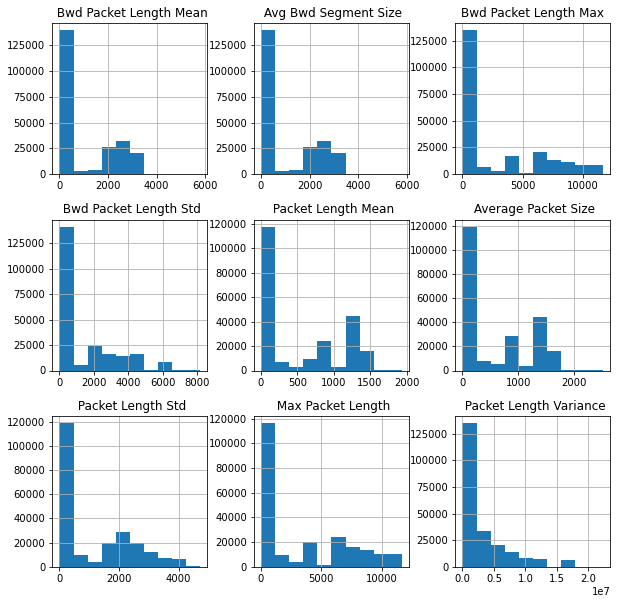

In [24]:
hist = df_high_corr.hist(figsize=(10,10))

# 7. [10 pts] Attempt a few classifier models and report their 10-fold CV performance.


In [25]:
column_names = np.append(selected_features, ' Label')
df = df[column_names]

In [26]:
df.head()

,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,Bwd Packet Length Std,Packet Length Mean,Average Packet Size,Packet Length Std,Max Packet Length,Packet Length Variance,Destination Port,Label
0,0.0,0.0,0,0.0,6.0,9.0,0.0,6,0.0,other ports,0
1,6.0,6.0,6,0.0,6.0,9.0,0.0,6,0.0,other ports,0
2,6.0,6.0,6,0.0,6.0,9.0,0.0,6,0.0,other ports,0
3,6.0,6.0,6,0.0,6.0,9.0,0.0,6,0.0,other ports,0
4,0.0,0.0,0,0.0,6.0,9.0,0.0,6,0.0,other ports,0


In [27]:
df.shape

(225745, 11)

In [28]:
from sklearn.preprocessing import OneHotEncoder
X = df[selected_features].values
X.shape[1]

10

In [29]:
passthrough = []
for i in range(0,X.shape[1]-1):
    passthrough.append(i)

In [30]:
passthrough

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [31]:
from sklearn.compose import ColumnTransformer
c_transf = ColumnTransformer([ 
    ('onehot', OneHotEncoder(), [9]),
    ('nothing', 'passthrough', passthrough)
])
X = c_transf.fit_transform(X).astype(float)

In [32]:
X.shape

(225745, 16)

In [33]:
y = df[' Label']

In [34]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,n_jobs=-1)
kfold = StratifiedKFold(n_splits=10).split(X, y)
scores = []
for k, (train, test) in enumerate(kfold):
     clf.fit(X[train], y[train])
     score = clf.score(X[test], y[test])
     scores.append(score)
     print('Fold: %2d, Acc: %.3f' % (k+1, score))
print("Mean Accuracy", np.mean(scores))

Fold:  1, Acc: 1.000
Fold:  2, Acc: 1.000
Fold:  3, Acc: 1.000
Fold:  4, Acc: 1.000
Fold:  5, Acc: 1.000
Fold:  6, Acc: 0.999
Fold:  7, Acc: 1.000
Fold:  8, Acc: 1.000
Fold:  9, Acc: 0.999
Fold: 10, Acc: 0.998
Mean Accuracy 0.9993798259270041


## Linear SVM

In [36]:
# from sklearn.svm import LinearSVC
# clf = LinearSVC(random_state=0,max_iter=500)
# kfold = StratifiedKFold(n_splits=10).split(X, y)
# scores = []
# for k, (train, test) in enumerate(kfold):
#      clf.fit(X[train], y[train])
#      score = clf.score(X[test], y[test])
#      scores.append(score)
#      print('Fold: %2d, Acc: %.3f' % (k+1, score))
# print("Mean Accuracy", np.mean(scores))

## RBF SVM

In [37]:
# from sklearn.svm import SVC
# clf = SVC(kernel = 'rbf',random_state=0)
# kfold = StratifiedKFold(n_splits=10).split(X, y)
# scores = []
# for k, (train, test) in enumerate(kfold):
#      clf.fit(X[train], y[train])
#      score = clf.score(X[test], y[test])
#      scores.append(score)
#      print('Fold: %2d, Acc: %.3f' % (k+1, score))
# print("Mean Accuracy", np.mean(scores))


# 8. [10 pts] Convert your code to be used for the remaining 7 datasets, i.e. Datasets 2-8.


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

def getInfo(csvPath):
    # Locate and load the data file
    df = pd.read_csv(csvPath)
    # Sanity check
    print('=========================================')
    print('File Path')
    print('-----------------------------------------')
    print('=========================================')
    print('Data Shape');
    print('-----------------------------------------')
    print(f'N rows={len(df)}, M columns={len(df.columns)}')
    print('=========================================')
    print('Feature Names')
    print('-----------------------------------------')
    print(df.columns.values)
    print('=========================================')
    print('LABELS')
    print('-----------------------------------------')
    print(df[' Label'].value_counts())
    print('=========================================')
    print('LABELS AFTER BINARY CONVERSION')
    print('-----------------------------------------')
    df[' Label'] = pd.Series(np.where(df[' Label'] == 'BENIGN', 0, 1), df.index)
    print(df[' Label'].value_counts())
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    df[indices_to_keep].astype(np.float64)
    df = df.reset_index()
    print('=========================================')
    print('One hot encoding of Destination Port')
    print('-----------------------------------------')
    importantPorts = df[' Destination Port'].isin([20,21,22,23,25,53,80,110,119,123,143,161,194,443])
    df[' Destination Port'] = df[' Destination Port'].where(importantPorts,'other ports')
    df[' Destination Port'] = df[' Destination Port'].astype(str) 
    print(df[' Destination Port'].value_counts())
    X = df[selected_features].values
    passthrough = []
    for i in range(0,X.shape[1]-1):
        passthrough.append(i)
    c_transf = ColumnTransformer([ 
        ('onehot', OneHotEncoder(), [9]),
        ('nothing', 'passthrough', passthrough)
    ])
    X = c_transf.fit_transform(X).astype(float)   
    print('X.shape', X.shape)
    y = df[' Label'].values
    print('y.shape', y.shape)
    print('=========================================')
    print('Random Forest Classifier')
    print('-----------------------------------------')
    clf = RandomForestClassifier(random_state=0,n_jobs=-1)
    kfold = StratifiedKFold(n_splits=10).split(X, y)
    scores = []
    for k, (train, test) in enumerate(kfold):
         clf.fit(X[train], y[train])
         score = clf.score(X[test], y[test])
         scores.append(score)
         print('Fold: %2d, Acc: %.3f' % (k+1, score))
    print("Mean Accuracy", np.mean(scores))


# 9. [10 pts] Pick a classifier and report it's evaluation for the remaining 7 datasets. Note that one dataset has a single class, which might need an unsupervised learning

File Path
-----------------------------------------
Data Shape
-----------------------------------------
N rows=286467, M columns=79
Feature Names
-----------------------------------------
[' Destination Port' ' Flow Duration' ' Total Fwd Packets'
 ' Total Backward Packets' 'Total Length of Fwd Packets'
 ' Total Length of Bwd Packets' ' Fwd Packet Length Max'
 ' Fwd Packet Length Min' ' Fwd Packet Length Mean'
 ' Fwd Packet Length Std' 'Bwd Packet Length Max' ' Bwd Packet Length Min'
 ' Bwd Packet Length Mean' ' Bwd Packet Length Std' 'Flow Bytes/s'
 ' Flow Packets/s' ' Flow IAT Mean' ' Flow IAT Std' ' Flow IAT Max'
 ' Flow IAT Min' 'Fwd IAT Total' ' Fwd IAT Mean' ' Fwd IAT Std'
 ' Fwd IAT Max' ' Fwd IAT Min' 'Bwd IAT Total' ' Bwd IAT Mean'
 ' Bwd IAT Std' ' Bwd IAT Max' ' Bwd IAT Min' 'Fwd PSH Flags'
 ' Bwd PSH Flags' ' Fwd URG Flags' ' Bwd URG Flags' ' Fwd Header Length'
 ' Bwd Header Length' 'Fwd Packets/s' ' Bwd Packets/s'
 ' Min Packet Length' ' Max Packet Length' ' Packet Length 

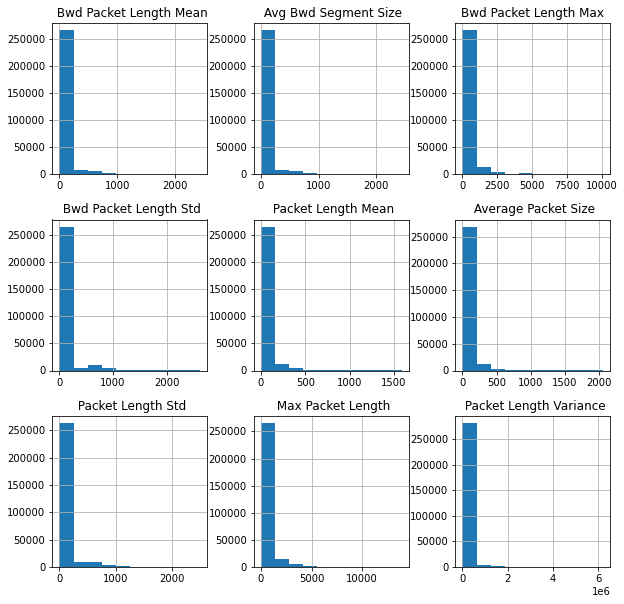

In [42]:
# df = getInfo('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv');
# Locate and load the data file
df = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
# Sanity check
print('=========================================')
print('File Path')
print('-----------------------------------------')
print('=========================================')
print('Data Shape');
print('-----------------------------------------')
print(f'N rows={len(df)}, M columns={len(df.columns)}')
print('=========================================')
print('Feature Names')
print('-----------------------------------------')
print(df.columns.values)
print('=========================================')
print('LABELS')
print('-----------------------------------------')
print(df[' Label'].value_counts())
print('=========================================')
print('LABELS AFTER BINARY CONVERSION')
print('-----------------------------------------')
df[' Label'] = pd.Series(np.where(df[' Label'] == 'BENIGN', 0, 1), df.index)
print(df[' Label'].value_counts())
df.dropna(inplace=True)
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
df[indices_to_keep].astype(np.float64)
df = df.reset_index()
print('=========================================')
print('One hot encoding of Destination Port')
print('-----------------------------------------')
importantPorts = df[' Destination Port'].isin([20,21,22,23,25,53,80,110,119,123,143,161,194,443])
df[' Destination Port'] = df[' Destination Port'].where(importantPorts,'other ports')
df[' Destination Port'] = df[' Destination Port'].astype(str) 
print(df[' Destination Port'].value_counts())
X = df[selected_features].values
passthrough = []
for i in range(0,X.shape[1]-1):
    passthrough.append(i)
c_transf = ColumnTransformer([ 
    ('onehot', OneHotEncoder(), [9]),
    ('nothing', 'passthrough', passthrough)
])
X = c_transf.fit_transform(X).astype(float)   
print(X)
print('X.shape', X.shape)
print('y.shape', y.shape)
y = df[' Label'].values

print('=========================================')
print('Random Forest Classifier')
print('-----------------------------------------')
clf = RandomForestClassifier(random_state=0,n_jobs=-1)
kfold = StratifiedKFold(n_splits=10).split(X, y)
scores = []
for k, (train, test) in enumerate(kfold):
     clf.fit(X[train], y[train])
     score = clf.score(X[test], y[test])
     scores.append(score)
     print('Fold: %2d, Acc: %.3f' % (k+1, score))
print("Mean Accuracy", np.mean(scores))

File Path
-----------------------------------------
Data Shape
-----------------------------------------
N rows=191033, M columns=79
Feature Names
-----------------------------------------
[' Destination Port' ' Flow Duration' ' Total Fwd Packets'
 ' Total Backward Packets' 'Total Length of Fwd Packets'
 ' Total Length of Bwd Packets' ' Fwd Packet Length Max'
 ' Fwd Packet Length Min' ' Fwd Packet Length Mean'
 ' Fwd Packet Length Std' 'Bwd Packet Length Max' ' Bwd Packet Length Min'
 ' Bwd Packet Length Mean' ' Bwd Packet Length Std' 'Flow Bytes/s'
 ' Flow Packets/s' ' Flow IAT Mean' ' Flow IAT Std' ' Flow IAT Max'
 ' Flow IAT Min' 'Fwd IAT Total' ' Fwd IAT Mean' ' Fwd IAT Std'
 ' Fwd IAT Max' ' Fwd IAT Min' 'Bwd IAT Total' ' Bwd IAT Mean'
 ' Bwd IAT Std' ' Bwd IAT Max' ' Bwd IAT Min' 'Fwd PSH Flags'
 ' Bwd PSH Flags' ' Fwd URG Flags' ' Bwd URG Flags' ' Fwd Header Length'
 ' Bwd Header Length' 'Fwd Packets/s' ' Bwd Packets/s'
 ' Min Packet Length' ' Max Packet Length' ' Packet Length 

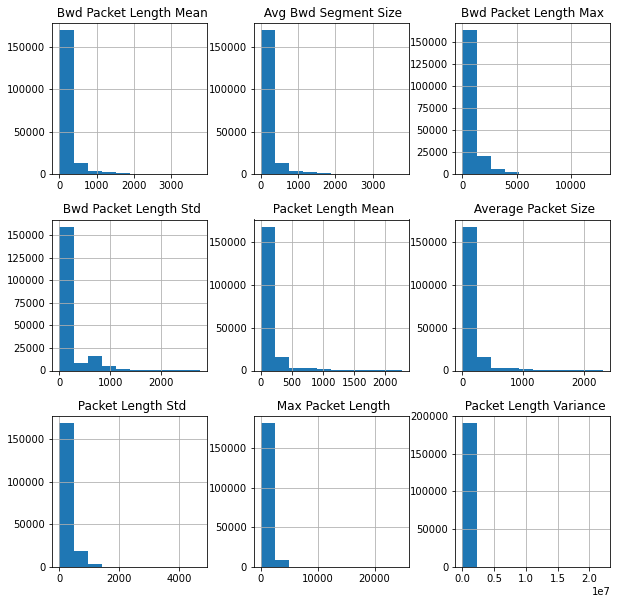

In [43]:
df = getInfo('Friday-WorkingHours-Morning.pcap_ISCX.csv');

File Path
-----------------------------------------
Data Shape
-----------------------------------------
N rows=288602, M columns=79
Feature Names
-----------------------------------------
[' Destination Port' ' Flow Duration' ' Total Fwd Packets'
 ' Total Backward Packets' 'Total Length of Fwd Packets'
 ' Total Length of Bwd Packets' ' Fwd Packet Length Max'
 ' Fwd Packet Length Min' ' Fwd Packet Length Mean'
 ' Fwd Packet Length Std' 'Bwd Packet Length Max' ' Bwd Packet Length Min'
 ' Bwd Packet Length Mean' ' Bwd Packet Length Std' 'Flow Bytes/s'
 ' Flow Packets/s' ' Flow IAT Mean' ' Flow IAT Std' ' Flow IAT Max'
 ' Flow IAT Min' 'Fwd IAT Total' ' Fwd IAT Mean' ' Fwd IAT Std'
 ' Fwd IAT Max' ' Fwd IAT Min' 'Bwd IAT Total' ' Bwd IAT Mean'
 ' Bwd IAT Std' ' Bwd IAT Max' ' Bwd IAT Min' 'Fwd PSH Flags'
 ' Bwd PSH Flags' ' Fwd URG Flags' ' Bwd URG Flags' ' Fwd Header Length'
 ' Bwd Header Length' 'Fwd Packets/s' ' Bwd Packets/s'
 ' Min Packet Length' ' Max Packet Length' ' Packet Length 

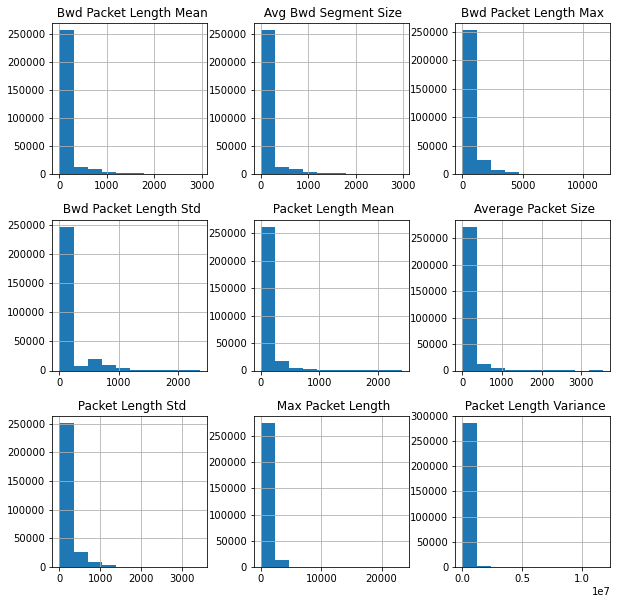

In [44]:
df = getInfo('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv');

File Path
-----------------------------------------
Data Shape
-----------------------------------------
N rows=170366, M columns=79
Feature Names
-----------------------------------------
[' Destination Port' ' Flow Duration' ' Total Fwd Packets'
 ' Total Backward Packets' 'Total Length of Fwd Packets'
 ' Total Length of Bwd Packets' ' Fwd Packet Length Max'
 ' Fwd Packet Length Min' ' Fwd Packet Length Mean'
 ' Fwd Packet Length Std' 'Bwd Packet Length Max' ' Bwd Packet Length Min'
 ' Bwd Packet Length Mean' ' Bwd Packet Length Std' 'Flow Bytes/s'
 ' Flow Packets/s' ' Flow IAT Mean' ' Flow IAT Std' ' Flow IAT Max'
 ' Flow IAT Min' 'Fwd IAT Total' ' Fwd IAT Mean' ' Fwd IAT Std'
 ' Fwd IAT Max' ' Fwd IAT Min' 'Bwd IAT Total' ' Bwd IAT Mean'
 ' Bwd IAT Std' ' Bwd IAT Max' ' Bwd IAT Min' 'Fwd PSH Flags'
 ' Bwd PSH Flags' ' Fwd URG Flags' ' Bwd URG Flags' ' Fwd Header Length'
 ' Bwd Header Length' 'Fwd Packets/s' ' Bwd Packets/s'
 ' Min Packet Length' ' Max Packet Length' ' Packet Length 

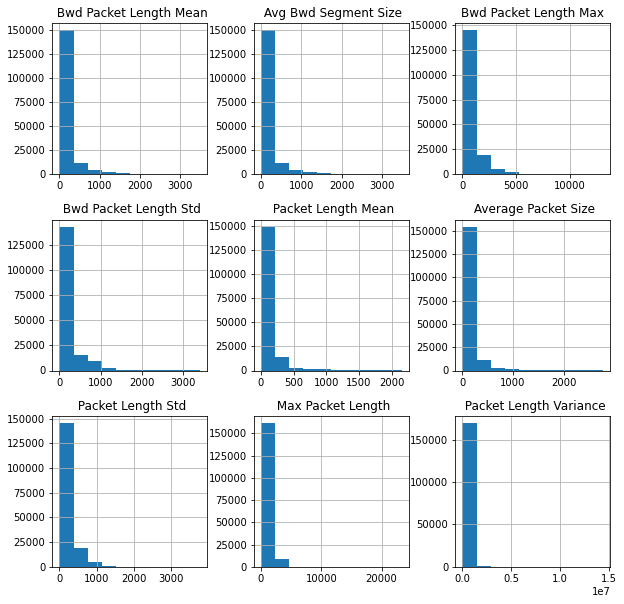

In [45]:
df = getInfo('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv');

File Path
-----------------------------------------
Data Shape
-----------------------------------------
N rows=445909, M columns=79
Feature Names
-----------------------------------------
[' Destination Port' ' Flow Duration' ' Total Fwd Packets'
 ' Total Backward Packets' 'Total Length of Fwd Packets'
 ' Total Length of Bwd Packets' ' Fwd Packet Length Max'
 ' Fwd Packet Length Min' ' Fwd Packet Length Mean'
 ' Fwd Packet Length Std' 'Bwd Packet Length Max' ' Bwd Packet Length Min'
 ' Bwd Packet Length Mean' ' Bwd Packet Length Std' 'Flow Bytes/s'
 ' Flow Packets/s' ' Flow IAT Mean' ' Flow IAT Std' ' Flow IAT Max'
 ' Flow IAT Min' 'Fwd IAT Total' ' Fwd IAT Mean' ' Fwd IAT Std'
 ' Fwd IAT Max' ' Fwd IAT Min' 'Bwd IAT Total' ' Bwd IAT Mean'
 ' Bwd IAT Std' ' Bwd IAT Max' ' Bwd IAT Min' 'Fwd PSH Flags'
 ' Bwd PSH Flags' ' Fwd URG Flags' ' Bwd URG Flags' ' Fwd Header Length'
 ' Bwd Header Length' 'Fwd Packets/s' ' Bwd Packets/s'
 ' Min Packet Length' ' Max Packet Length' ' Packet Length 

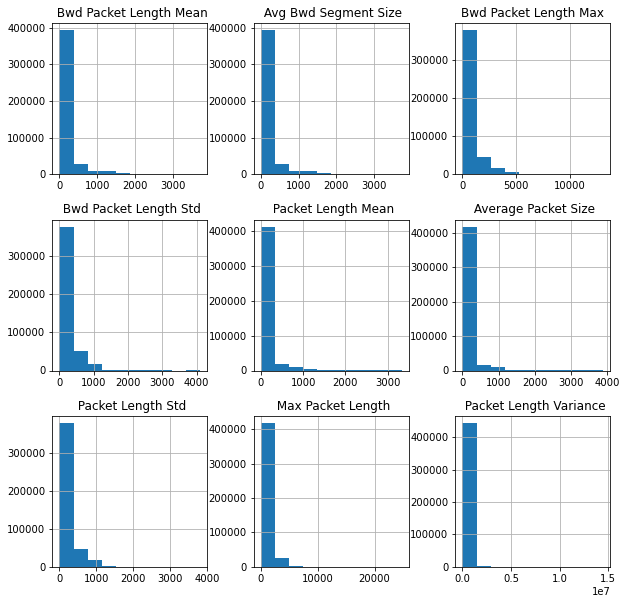

In [46]:
df = getInfo('Tuesday-WorkingHours.pcap_ISCX.csv');


File Path
-----------------------------------------
Data Shape
-----------------------------------------
N rows=692703, M columns=79
Feature Names
-----------------------------------------
[' Destination Port' ' Flow Duration' ' Total Fwd Packets'
 ' Total Backward Packets' 'Total Length of Fwd Packets'
 ' Total Length of Bwd Packets' ' Fwd Packet Length Max'
 ' Fwd Packet Length Min' ' Fwd Packet Length Mean'
 ' Fwd Packet Length Std' 'Bwd Packet Length Max' ' Bwd Packet Length Min'
 ' Bwd Packet Length Mean' ' Bwd Packet Length Std' 'Flow Bytes/s'
 ' Flow Packets/s' ' Flow IAT Mean' ' Flow IAT Std' ' Flow IAT Max'
 ' Flow IAT Min' 'Fwd IAT Total' ' Fwd IAT Mean' ' Fwd IAT Std'
 ' Fwd IAT Max' ' Fwd IAT Min' 'Bwd IAT Total' ' Bwd IAT Mean'
 ' Bwd IAT Std' ' Bwd IAT Max' ' Bwd IAT Min' 'Fwd PSH Flags'
 ' Bwd PSH Flags' ' Fwd URG Flags' ' Bwd URG Flags' ' Fwd Header Length'
 ' Bwd Header Length' 'Fwd Packets/s' ' Bwd Packets/s'
 ' Min Packet Length' ' Max Packet Length' ' Packet Length 

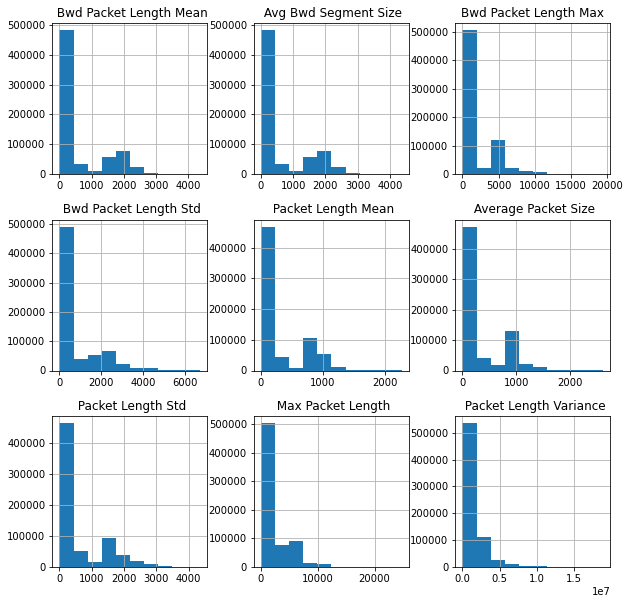

In [47]:
df = getInfo('Wednesday-workingHours.pcap_ISCX.csv');


## Unsupervised Dataset

In [ ]:
df = getInfo('Monday-WorkingHours.pcap_ISCX.csv');


# 10. [10 pts] Briefly write up your thoughts about developing a machine learning model where
you are not a subject matter expert, such as, developing a cybersecurity intrusion detection
pipeline as in this assignment.

## Answer:
* Determing what features to use for dataset where I am not the subject matter expert was surprisingly not too difficult. Relying on correlation between the features and the target variable, I was able to select the top 10 features that were highly correlated. The accuracies of most intrusions via Random Forest Classifier was above 97%.
* However, without the prior knowledge that we should be one hot encoding important port numbers, the model would have been less robust, thus it is important to consult subject matter experts in this area 